In [1]:
"""import sys
!conda install --yes --prefix {sys.prefix}  plotly plotly 
#This is a really cool way to install modules right from Jupyter"""
!pip install plotly

  Using cached nbformat-4.4.0-py2.py3-none-any.whl
  Using cached jsonschema-2.6.0-py2.py3-none-any.whl
  Using cached jupyter_core-4.4.0-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/Library/Python/2.7/site-packages/pip-9.0.1-py2.7.egg/pip/wheel.py", lin

In [2]:
import pandas as pd
test_data=pd.read_csv('./test.csv')
train_data =pd.read_csv('./train.csv')

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import site; site.getsitepackages()

/Users/yadapruksachatkun/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,13,48,50,55,90,125,144,162,163,164,166,168,169,170,171,172,174,176,241,243,245,247,251,254,273,289,291,292,293,295,296,312,313,314,331,343,365,373,375,396,413,439,490,619,623,630,633,638,642,644,669,712,759,768,788,809,828,928,953,978,1000,1001,1002,1003,1004,1023,1036,1040,1042,1063,1085,1098,1099,1120,1128,1135,1151,1152,1165,1167,1181,1192,1204,1205,1206,1207,1215,1225,1227,1229,1231,1233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/yadapruksachatkun/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12,49,51,56,91,126,145,163,165,166,167,168,169,171,173,174,176,177,242,244,246,248,252,255,274,290,291,292,294,295,296,332,344,366,374,376,397,414,440,491,620,634,639,642,643,645,710,713,760,769,810,829,929,954,979,100

['/usr/local/opt/python3/bin/../Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages']

In [3]:
from sklearn import decomposition

In [27]:
cols_to_remove = []

for col in train_data.columns:
    try:
        _ = train_data[col].astype(float)
    except ValueError:
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
train_data_new = train_data[[col for col in train_data.columns if col not in cols_to_remove]]
label_Y = train_data_new['is_female']
train_data_new = train_data_new.drop(['is_female'], axis=1)
data_test = train_data_new[:2000]
train_data_new = train_data_new[2000:]
train_data_new[:10]

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,DG3,DG3A,DG4,DG4_OTHERS,DG5_1,DG5_2,DG5_3,DG5_4,DG5_5,DG5_6,DG5_7,DG5_8,DG5_9,DG5_10,DG5_11,DG5_96,DG6,DG8a,DG8b,DG8c,DG9a,...,FB27_96,FB28_1,FB28_2,FB28_3,FB28_4,FB28_5,FB28_6,FB28_7,FB28_8,FB28_9,FB28_96,FB28_3_OTHERS,FB29_1,FB29_2,FB29_3,FB29_4,FB29_5,FB29_6,FB29_96,LN1A,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
2000,2000,2,26,NaN,8.0,268081,2343,338,1986,3,4,5,NaN,1,2,2,2,2,1,1,2,2,1,2,2,1,2,2,0,2.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,4,4,2,2,4,4,2.0,2,2,2,2
2001,2001,1,16,NaN,6.0,166101,797,153,1998,1,4,5,NaN,1,2,2,2,2,1,1,2,2,2,2,2,3,4,3,0,3.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,3,3,5,5,3.0,4,3,3,4
2002,2002,3,34,3.0,NaN,343041,4100,511,1995,1,5,7,NaN,1,2,2,2,1,1,1,2,2,1,2,2,3,7,0,0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,3,3,4,4,3.0,4,4,4,4
2003,2003,3,33,NaN,7.0,337221,3467,429,1994,1,4,6,NaN,1,1,2,2,2,1,2,2,2,2,2,2,1,2,2,0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,4,4,5,5,1.0,1,4,4,4
2004,2004,2,26,NaN,6.0,266181,2295,335,1980,8,4,6,NaN,1,1,2,2,2,1,1,2,2,1,2,2,2,2,1,0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1,1,3,3,5,5,NaN,2,2,2,2
2005,2005,2,23,NaN,6.0,236111,1407,230,1976,3,4,1,NaN,1,2,2,2,2,1,1,2,2,2,2,2,2,1,1,2,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,4,4,1,1,1,1,2.0,2,2,2,2
2006,2006,3,34,1.0,NaN,341011,99999,518,1964,5,4,10,NaN,1,1,2,2,2,1,1,2,2,1,2,2,1,1,0,0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2,2,2,2,2,2,2,1,1,5,4,4,1,1.0,1,1,1,1
2007,2007,3,34,NaN,8.0,348081,4278,529,1991,7,4,7,NaN,1,1,2,2,2,1,1,2,2,1,2,2,3,2,0,0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1,1,4,4,5,5,1.0,4,4,4,4
2008,2008,1,31,NaN,7.0,317161,571,113,1991,3,4,1,NaN,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,0,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,4,4,1,1,1,1,2.0,2,99,2,99
2009,2009,1,15,NaN,8.0,158011,219,39,1974,3,3,1,NaN,1,2,2,2,2,1,1,2,2,2,2,2,2,2,1,2,1.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,4,4,1,1,3,3,2.0,2,2,2,3


In [42]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
cleaned_train_data = imp.fit_transform(train_data_new)
cleaned_test_data = imp.fit_transform(data_test)


In [43]:
pca = decomposition.PCA(n_components=3)
Y_sklearn = pca.fit_transform(cleaned_train_data)
test_sklearn = pca.fit_transform(cleaned_test_data)
pcaR = pca.fit(cleaned_train_data)


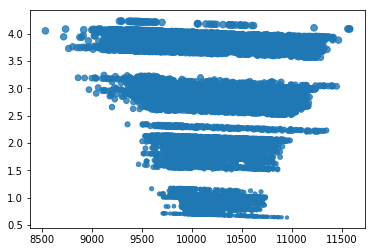

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# print(pcaR.components_)
# print(Y_sklearn.shape)
X_new = pca.inverse_transform(Y_sklearn)
plt.scatter(X_new[:,0], X_new[:,1],X_new[:,2], alpha = 0.8)

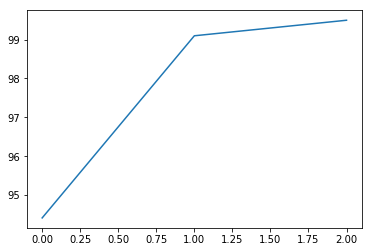

In [37]:
import numpy as np
var = pcaR.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [39]:
clf.fit(Y_sklearn, label_Y[2000:])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
# Importing in the test.csv
clf.score(test_sklearn, label_Y[:2000])
# REALLY BAD 

0.55349999999999999

In [59]:
specific_features = train_data_new["DL1", "DL2", "DL3", "DL7", "Mt5", "Mt6", "Mt9", "mt17_1", "MT17_@", "MT17_4", "FF1", "MM14", "MM15"]

KeyError: ('DL1', 'DL2', 'DL3', 'DL7', 'Mt5', 'Mt6', 'Mt9', 'mt17_1', 'MT17_@', 'MT17_4', 'FF1', 'MM14', 'MM15')